In [ ]:
# AB Test using T-Test for Email Marketing Study 

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats 

In [3]:
PATH = "C:/Users/rakim/Downloads/DS_-_ab_edited.csv"
df = pd.read_csv(PATH)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [6]:
df["date"] = pd.DatetimeIndex(df["timestamp"]).date
print(df.date.unique())

[datetime.date(2017, 1, 21) datetime.date(2017, 1, 12)
 datetime.date(2017, 1, 11) datetime.date(2017, 1, 8)
 datetime.date(2017, 1, 10) datetime.date(2017, 1, 19)
 datetime.date(2017, 1, 17) datetime.date(2017, 1, 4)
 datetime.date(2017, 1, 15) datetime.date(2017, 1, 18)
 datetime.date(2017, 1, 9) datetime.date(2017, 1, 22)
 datetime.date(2017, 1, 24) datetime.date(2017, 1, 23)
 datetime.date(2017, 1, 20) datetime.date(2017, 1, 5)
 datetime.date(2017, 1, 6) datetime.date(2017, 1, 13)
 datetime.date(2017, 1, 7) datetime.date(2017, 1, 3)
 datetime.date(2017, 1, 2) datetime.date(2017, 1, 16)
 datetime.date(2017, 1, 14)]


In [7]:
df.head(5)

,user_id,timestamp,group,landing_page,converted,date
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21


In [8]:
df.tail(5)

,user_id,timestamp,group,landing_page,converted,date
290580,751197,2017-01-03 22:28:38.630509,control,old_page,0,2017-01-03
290581,945152,2017-01-12 00:51:57.078372,control,old_page,0,2017-01-12
290582,734608,2017-01-22 11:45:03.439544,control,old_page,0,2017-01-22
290583,697314,2017-01-15 01:20:28.957438,control,old_page,0,2017-01-15
290584,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,2017-01-16


In [9]:
df.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [10]:
df.shape

(290585, 6)

In [11]:
# The size of each group 
print("test sample size:", len(df[df.group == "treatment"]))
print("control sample size:", len(df[df.group == "control"]))
print("test proportion:", df.converted.mean())
print()

test sample size: 145311
control sample size: 145274
test proportion: 0.11959667567149027



In [16]:

# What is the signup rate of the control and test groups?

print("test signup rate:", df[df.group == "treatment"].converted.mean())
print("control sample size:", df[df.group == "control"].converted.mean())

test signup rate: 0.11880724790277405
control sample size: 0.1203863045004612


In [17]:
# Are the test and control groups significantly different?

stats.ttest_ind(df[df.group == "treatment"].converted,
                df[df.group == "control"].converted)

Ttest_indResult(statistic=-1.3116069027036807, pvalue=0.18965383906859376)

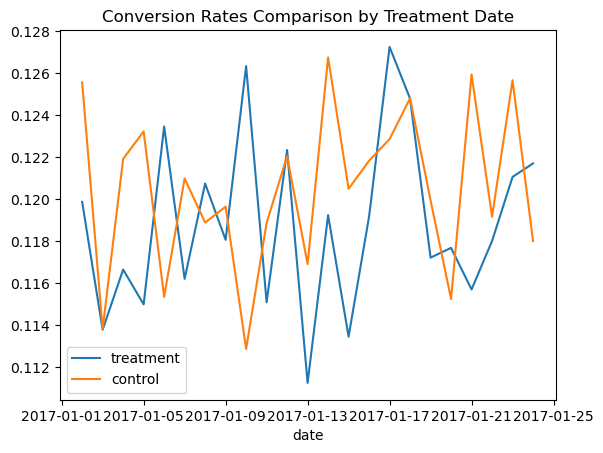

T-Test Results by Date
Ttest_indResult(statistic=-1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=-0.6795024407955, pvalue=0.49683133482307695)
Ttest_indResult(statistic=0.3311190318174456, pvalue=0.7405597598504309)
Ttest_indResult(statistic=2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=-0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=-0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=-1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=-0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=-0.2807125559476893, pvalue=0.7789352633524722)
Ttest_indResult(statistic=-0.20561364462525766, pvalue=0.837095874040602)
Ttest_indResult(statistic=0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult(sta

In [19]:
# Analyze rollout

fig = df[df.group == 'treatment'][
    ['date', 'converted']].groupby('date').mean().plot()
df[df.group == 'control'][
    ['date', 'converted']].groupby('date').mean().plot(ax=fig)

plt.legend(['treatment','control'])
plt.title('Conversion Rates Comparison by Treatment Date')
plt.show()


# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')

for day in df.date.unique():
    dated_data = df[df.date == day]
    print(stats.ttest_ind(dated_data[dated_data.group == 'treatment'].converted,
                          dated_data[dated_data.group == 'control'].converted))

In [ ]:
# There does not appear to be a significant difference in control and treatment
# groups overall and throughtout the rollout. 